### Bloque 1 — Librerías  
En este bloque se importan las librerías necesarias para construir, entrenar y evaluar el modelo de red neuronal.

Se utilizan TensorFlow y Keras para la arquitectura y el entrenamiento, NumPy y Matplotlib para cálculos y visualizaciones, scikit-learn para las métricas de evaluación, y PIL junto con funciones del sistema para procesar las imágenes desde Google Drive.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input, Dropout
from tensorflow.keras import callbacks, regularizers
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import random

### Bloque 2 — Carga de datos y preprocesamiento  
Aquí se carga el conjunto de datos MNIST, que contiene imágenes de dígitos escritos a mano del 0 al 9.  
Las imágenes se convierten a valores flotantes y se normalizan en un rango de 0 a 1 para mejorar el desempeño del entrenamiento.  
Se definen las variables de entrenamiento, prueba y el número total de clases.


In [ ]:
# Carga
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalización y forma (28,28,1)
x_train = (x_train.astype("float32") / 255.0)[..., None]
x_test  = (x_test.astype("float32")  / 255.0)[..., None]

# División explícita de validación
val_ratio = 0.1
n_val = int(len(x_train) * val_ratio)
x_val, y_val = x_train[:n_val], y_train[:n_val]
x_train_sub, y_train_sub = x_train[n_val:], y_train[n_val:]

num_classes = 10
x_train_sub.shape, x_val.shape, x_test.shape


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((54000, 28, 28, 1), (6000, 28, 28, 1), (10000, 28, 28, 1))

### Bloque 3 — Modelo MLP  
En este bloque se construye un modelo de red neuronal multicapa (MLP).  
El modelo incluye una capa de entrada que aplana las imágenes de 28x28 píxeles en un vector de 784 valores, seguida de tres capas densas con activación ReLU.  
La capa final utiliza la función softmax para clasificar las imágenes en una de las diez categorías posibles (dígitos del 0 al 9).  
Finalmente, se compila el modelo con el optimizador Adam y la función de pérdida sparse categorical crossentropy.

In [ ]:
model = Sequential()
model.add(Input(shape=(28, 28)))
model.add(Flatten())

# Capas ocultas (tu configuración)
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Capa de salida
model.add(Dense(10, activation='softmax'))

# Compilación
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

### Bloque 4 — Entrenamiento y gráficas  
En este bloque se entrena el modelo con los datos de entrenamiento, utilizando el 10% para validación.  
Se aplican las funciones EarlyStopping y ReduceLROnPlateau para optimizar el proceso de aprendizaje.  
Al finalizar el entrenamiento, se generan las gráficas de precisión y pérdida por época para analizar el comportamiento del modelo.

Epoch 1/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7766 - loss: 0.7199 - val_accuracy: 0.9573 - val_loss: 0.1536 - learning_rate: 0.0010
Epoch 2/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9550 - loss: 0.1542 - val_accuracy: 0.9707 - val_loss: 0.1019 - learning_rate: 0.0010
Epoch 3/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9701 - loss: 0.0992 - val_accuracy: 0.9748 - val_loss: 0.0877 - learning_rate: 0.0010
Epoch 4/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9778 - loss: 0.0764 - val_accuracy: 0.9767 - val_loss: 0.0792 - learning_rate: 0.0010
Epoch 5/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9829 - loss: 0.0569 - val_accuracy: 0.9742 - val_loss: 0.0854 - learning_rate: 0.0010
Epoch 6/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9848 - loss: 0.0490 - val_accuracy: 0.9770 - val_loss: 0.0799 - learning_rate: 0.0010
Epoch 7/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9920 - loss: 0.0274 - 

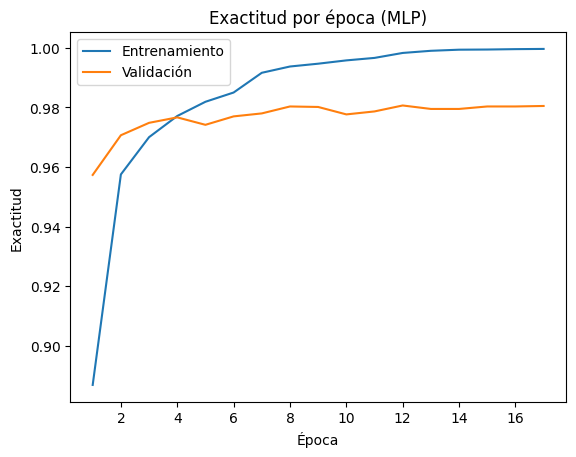

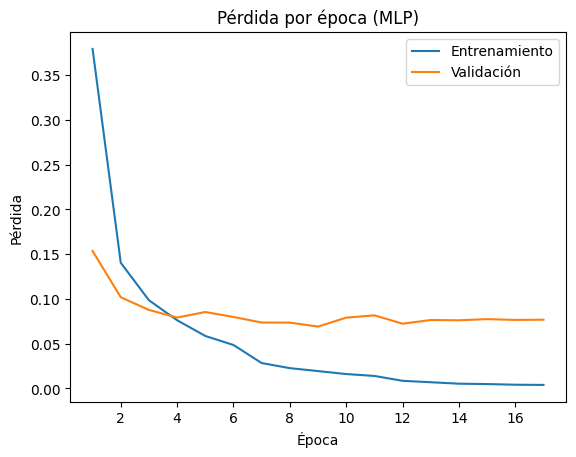

In [ ]:
early_stop = callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
reduce_lr  = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-5)

history = model.fit(
    x_train, y_train,
    validation_split=0.1,   # validación interna
    epochs=25,
    batch_size=128,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Exactitudes finales de entrenamiento y validación (Punto 1)
train_acc = history.history['accuracy'][-1]
val_acc   = history.history['val_accuracy'][-1]
print(f"Exactitud final en entrenamiento: {train_acc*100:.2f}%")
print(f"Exactitud final en validación:   {val_acc*100:.2f}%")

# Gráficas
epochs_range = range(1, len(history.history["loss"]) + 1)

plt.figure()
plt.plot(epochs_range, history.history["accuracy"], label="Entrenamiento")
plt.plot(epochs_range, history.history["val_accuracy"], label="Validación")
plt.xlabel("Época"); plt.ylabel("Exactitud"); plt.title("Exactitud por época (MLP)"); plt.legend(); plt.show()

plt.figure()
plt.plot(epochs_range, history.history["loss"], label="Entrenamiento")
plt.plot(epochs_range, history.history["val_loss"], label="Validación")
plt.xlabel("Época"); plt.ylabel("Pérdida"); plt.title("Pérdida por época (MLP)"); plt.legend(); plt.show()

### Bloque 5 — Evaluación en prueba  
En este bloque se evalúa el modelo utilizando el conjunto de prueba, compuesto por imágenes no vistas durante el entrenamiento.  
Se calcula la precisión obtenida y se compara con la validación para medir la capacidad de generalización del modelo.

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Exactitud en prueba (test): {test_acc*100:.2f}%")
print(f"Diferencia test - validación: {(test_acc - val_acc)*100:.2f} puntos porcentuales")


Exactitud en prueba (test): 97.82%
Diferencia test - validación: -0.23 puntos porcentuales


### Bloque 6 — Carga de imágenes personalizadas desde Drive  
En este bloque se monta Google Drive y se cargan las 50 imágenes personalizadas del usuario.  
Cada imagen se convierte a escala de grises, se redimensiona a 28x28 píxeles y se normaliza a un rango de 0 a 1, asegurando que mantenga el mismo formato que las imágenes del conjunto MNIST.

In [ ]:
# Montar Drive si aún no está montado
from google.colab import drive
drive.mount('/content/drive')

# Ruta exacta de tus imágenes
IMAGES_DIR = "/content/drive/MyDrive/Redes_Neuronales/Test/converted_images"

import os, glob
import numpy as np
from PIL import Image
import re

def load_and_preprocess_img(path):
    """Convierte imagen a gris, 28x28 y normaliza a [0,1]."""
    img = Image.open(path).convert("L")
    img = img.resize((28, 28), Image.BILINEAR)
    arr = np.array(img).astype("float32") / 255.0
    return arr

# Detecta automáticamente etiquetas a partir del nombre del archivo (debe contener el dígito)
imgs, labels = [], []
for f in sorted(glob.glob(os.path.join(IMAGES_DIR, "*.*"))):
    name = os.path.basename(f)
    m = re.search(r"\d", name)  # busca el primer dígito en el nombre
    if not m:
        continue
    label = int(m.group())
    imgs.append(load_and_preprocess_img(f))
    labels.append(label)

imgs_50 = np.stack(imgs, axis=0)
labels_50 = np.array(labels, dtype=int)

print("Imágenes cargadas:", imgs_50.shape)
print("Etiquetas detectadas:", np.unique(labels_50, return_counts=True))

Mounted at /content/drive
Imágenes cargadas: (100, 28, 28)
Etiquetas detectadas: (array([4]), array([100]))


### Bloque 7 — Evaluación del modelo con las imágenes personalizadas  
En este bloque se utiliza el modelo entrenado para predecir las etiquetas de las 50 imágenes cargadas desde Google Drive.  
Se calcula la exactitud alcanzada y se genera un reporte de clasificación con las métricas correspondientes.  
También se muestra la matriz de confusión y una selección de imágenes con su etiqueta real y la predicción obtenida.

Exactitud en el set de 50 imágenes (Drive): 0.00%
Comparación con validación: Δ=-98.05 pp
Comparación con test:       Δ=-97.82 pp

Reporte de clasificación (50 imágenes):
              precision    recall  f1-score   support

           3     0.0000    0.0000    0.0000       0.0
           4     0.0000    0.0000    0.0000     100.0
           8     0.0000    0.0000    0.0000       0.0

    accuracy                         0.0000     100.0
   macro avg     0.0000    0.0000    0.0000     100.0
weighted avg     0.0000    0.0000    0.0000     100.0

Matriz de confusión:
[[ 0  0  0]
 [ 8  0 92]
 [ 0  0  0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

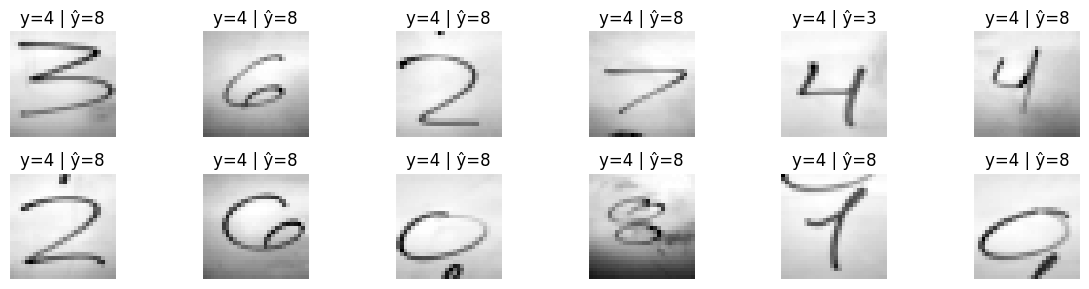

In [34]:
probs_50 = model.predict(imgs_50, verbose=0)
pred_50  = np.argmax(probs_50, axis=1)
acc_50   = np.mean(pred_50 == labels_50)

print(f"Exactitud en el set de 50 imágenes (Drive): {acc_50*100:.2f}%")
print(f"Comparación con validación: Δ={((acc_50 - val_acc)*100):.2f} pp")
print(f"Comparación con test:       Δ={((acc_50 - test_acc)*100):.2f} pp")

print("\nReporte de clasificación (50 imágenes):")
print(classification_report(labels_50, pred_50, digits=4))
print("Matriz de confusión:")
print(confusion_matrix(labels_50, pred_50))

# Visualización rápida
n = 12
idx = np.random.choice(len(imgs_50), n, replace=False)
plt.figure(figsize=(12, 3))
for i, k in enumerate(idx, 1):
    plt.subplot(2, 6, i)
    plt.imshow(imgs_50[k], cmap="gray")
    plt.title(f"y={labels_50[k]} | ŷ={pred_50[k]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

### Bloque 8 — Implementación de tres mejoras  
En este bloque se prueban tres versiones mejoradas del modelo base con el fin de comparar su rendimiento.  
Las mejoras aplicadas son:  
1. Dropout para reducir el sobreajuste.  
2. Regularización L2 para mejorar la estabilidad y penalizar pesos grandes.  
3. Estandarización Z-score para normalizar los datos.  
Finalmente, se comparan los resultados obtenidos con las tres variantes frente al modelo original.

In [ ]:
def build_dropout():
    m = Sequential([
        Input(shape=(28,28)), Flatten(),
        Dense(128, activation='relu'), Dropout(0.3),
        Dense(64, activation='relu'),  Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')
    ])
    m.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return m

def build_l2():
    reg = regularizers.l2(1e-4)
    m = Sequential([
        Input(shape=(28,28)), Flatten(),
        Dense(128, activation='relu', kernel_regularizer=reg),
        Dense(64, activation='relu',  kernel_regularizer=reg),
        Dense(32, activation='relu',  kernel_regularizer=reg),
        Dense(10, activation='softmax')
    ])
    m.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return m

def build_zscore():
    return build_dropout()

# Estandarización Z-score
mu, sigma = x_train.mean(), x_train.std() + 1e-7
x_train_z = (x_train - mu) / sigma
x_test_z  = (x_test  - mu) / sigma

def quick_train(model_fn, Xtr, ytr, Xte, yte, desc):
    m = model_fn()
    h = m.fit(Xtr, ytr, validation_split=0.1, epochs=8, batch_size=128, verbose=0)
    te_acc = m.evaluate(Xte, yte, verbose=0)[1]
    print(f"{desc}: test_acc={te_acc*100:.2f}% (best val={max(h.history['val_accuracy'])*100:.2f}%)")
    return te_acc

print("== Comparación de mejoras ==")
acc_l2 = quick_train(build_l2, x_train, y_train, x_test, y_test, "L2 Regularization")
acc_do = quick_train(build_dropout, x_train, y_train, x_test, y_test, "Dropout 0.3")
acc_zs = quick_train(build_zscore, x_train_z, y_train, x_test_z, y_test, "Estandarización Z-score")

print("\nResumen comparativo:")
print(f"Modelo base (arriba): {test_acc*100:.2f}%")
print(f"L2:       {acc_l2*100:.2f}%")
print(f"Dropout:  {acc_do*100:.2f}%")
print(f"Z-score:  {acc_zs*100:.2f}%")

== Comparación de mejoras ==
L2 Regularization: test_acc=97.10% (best val=97.80%)
Dropout 0.3: test_acc=97.40% (best val=97.87%)
Estandarización Z-score: test_acc=97.36% (best val=97.83%)

Resumen comparativo:
Modelo base (arriba): 97.82%
L2:       97.10%
Dropout:  97.40%
Z-score:  97.36%


## Guardar Modelo

In [32]:
# Save the model
model.save('mnist_model.keras')
print("Model saved as mnist_model.keras")

Model saved as mnist_model.keras
